<a href="https://colab.research.google.com/github/natalia-kurbakova/Baruch-Data-Challenge/blob/main/add_to_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [86]:
#loading data
train = pd.read_csv("train updated 04132022.csv")

#set option to display columns and rows of the dataframe fully
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [87]:
#creatig a dataframe
train = pd.DataFrame(train)

In [88]:
train['charging_rate_lag4'] = train['charging_rate_lag4'].abs()
train['discharging_rate_lag4'] = train['discharging_rate_lag4'].abs()
train['discharging_rate_lag3'] = train['discharging_rate_lag3'].abs()
train['charging_rate_lag3'] = train['charging_rate_lag3'].abs()

# VIZUALIZATION

In [89]:
#changing the datetime format in Date Deployed --- adding dashes to date!
train['Date Deployed'] = pd.to_datetime(train['Date Deployed']).dt.strftime('%Y-%m-%d')
years=[]
months=[]

for dates in train['Date Deployed']:
    dates[1].lstrip('0')
    dates = dates.split("-")
    year = int(dates[0])
    month = int(dates[1])
    years.append(year)
    months.append(month)

train['Year Deployed'] = years
train['Month Deployed'] = months

In [90]:
# last record == april 1st 2021
# calculate age of battery in months: 2021 - year deployed, times 12, plus 4 (april is the fourth month), substract month deployed
train['age_of_battery'] = (12*(2021 - train['Year Deployed']) + 4) - train['Month Deployed']
train.sample(n=5)

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,fail_7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed,Year Deployed,Month Deployed,age_of_battery
3305,11275,4.89,4.96,45.99,27.13,0.073333,-0.863333,3.55,7.45,90.56,50.22,0.076667,-0.510000,0,True,43.78,83.24,5.74,4.29,4.49,3.92,4.96,3.35,30.64,52.97,4.89,3.21,16.19,25.13,43.03,78.16,5.00,5.92,5.05,3.11,0.016667,-0.133333,3.116667,-0.013333,0.013333,0.010000,-0.143333,73.304348,73.260870,40.565217,1.130435,361.045652,356.402174,18.210870,30.373478,4169.043478,40.307692,48.584348,4/1/21,2019-11-16,2019,11,17
16910,26005,6.12,4.78,34.95,4.61,0.583333,-0.003333,5.91,3.34,55.50,4.11,0.266667,-0.293333,0,False,4.99,3.55,41.25,64.85,4.58,4.23,7.17,9.23,43.05,73.68,5.00,5.91,4.50,4.11,23.03,33.28,45.45,70.46,36.31,70.21,0.073333,-0.160000,-0.986667,-1.836667,0.086667,-0.043333,0.280000,90.333333,90.111111,1.388889,1.000000,330.756111,328.951667,19.277222,29.597222,4147.666667,14.923077,48.874444,4/1/21,2019-09-25,2019,9,19
16972,34643,40.57,6.10,4.93,5.44,0.006667,0.013333,54.57,5.52,3.62,6.04,0.136667,0.076667,1,True,32.89,53.98,39.96,70.73,4.61,4.06,32.26,66.12,20.79,32.10,18.66,28.17,34.97,53.75,7.60,9.52,6.10,5.25,4.92,4.33,2.703333,-0.100000,0.003333,-0.880000,1.086667,0.080000,-0.016667,75.809524,75.714286,17.095238,2.809524,343.053809,340.337143,19.268095,30.466190,4155.142857,27.333333,49.734286,4/1/21,2019-09-07,2019,9,19
4754,12706,42.27,6.13,4.61,4.75,0.020000,-0.040000,93.66,5.61,3.88,3.49,0.120000,-0.140000,1,True,4.73,3.61,4.66,4.70,42.16,62.94,5.00,6.09,4.86,4.36,6.34,9.09,5.10,6.16,4.85,3.99,36.73,63.76,NaN,NaN,0.370000,0.016667,-0.020000,0.180000,0.266667,-0.133333,-0.016667,109.285714,109.214286,33.357143,5.642857,354.280714,351.499286,12.657143,19.786429,4167.142857,36.600000,32.443571,4/1/21,2019-08-21,2019,8,20
14735,48516,6.13,4.72,6.39,44.40,0.010000,0.143333,6.16,4.06,4.23,85.06,0.246667,-0.050000,1,True,5.28,4.41,4.49,4.09,4.95,3.97,5.04,5.88,5.91,4.83,5.21,5.85,4.52,4.21,4.95,3.64,35.21,68.45,5.14,5.04,0.003333,0.013333,-0.246667,0.003333,0.023333,0.003333,0.170000,114.875000,114.875000,3.312500,1.750000,354.589375,351.108125,10.106250,15.041250,4159.000000,27.000000,25.147500,4/1/21,2019-09-27,2019,9,19


In [91]:
train['delta_discharging_rate'] = (train['discharging_rate_lag3'] - train['discharging_rate_lag4'])/train['discharging_rate_lag4']

In [92]:
train['delta_charging_rate'] = (train['charging_rate_lag3'] - train['charging_rate_lag4'])/train['charging_rate_lag4']

In [93]:
#devices that failed
failed_true = train[train['fail_7']==1]

In [94]:
fail_7_count = failed_true.count().max()
fail_7_count

9401

In [95]:
age_categories = train['age_of_battery'].unique()
age_categories

array([18, 19, 17, 20, 16, 15, 14])

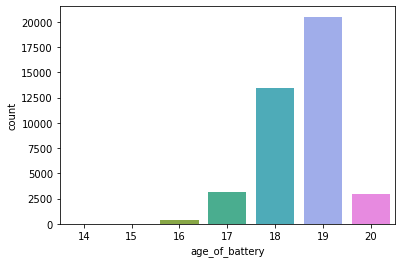

In [96]:
sns.set_palette('RdBu_r')
sns.countplot(data=train, x='age_of_battery')

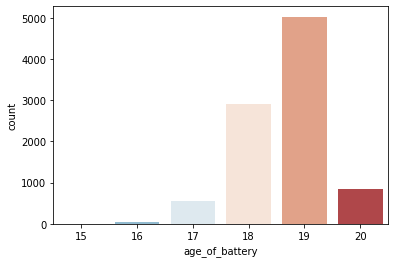

In [97]:
sns.countplot(data=failed_true, x='age_of_battery')
plt.show()

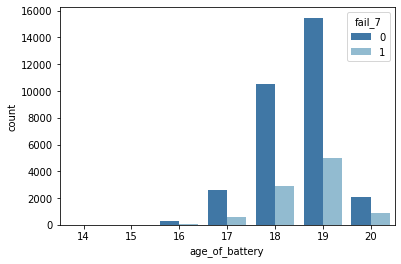

In [98]:
sns.countplot(data=train, x='age_of_battery', hue='fail_7')

In [99]:
#devices that didn't fail yest - same size as failed_true
failed_false = train[train['fail_7']==0].sample(n=fail_7_count)

In [100]:
df_different_size = pd.concat([failed_true,failed_false], ignore_index=True)

In [101]:
abnormal_cycle_time = train[train['charge_cycle_time_below_12']==True]
normal_cycle_time = train[train['charge_cycle_time_below_12']==False]

abnormal_cycle_time_failed = abnormal_cycle_time[abnormal_cycle_time['fail_7']==1]
#abnormal_cycle_time_failed.sample(n=15)
#abnormal_cycle_time.groupby('fail_7').count()
#normal_cycle_time.groupby('fail_7').count()

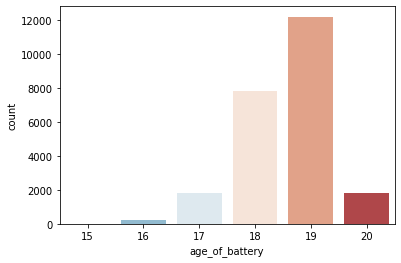

In [102]:
sns.countplot(data=abnormal_cycle_time, x='age_of_battery')
plt.show()

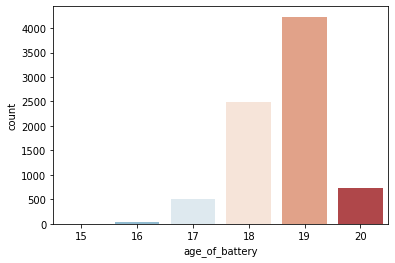

In [103]:
sns.countplot(data=abnormal_cycle_time_failed, x='age_of_battery')
plt.show()

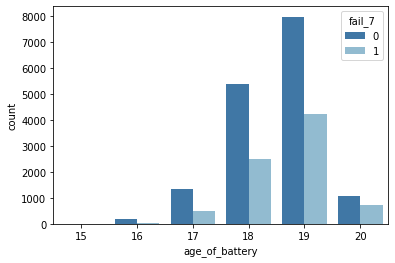

In [104]:
sns.countplot(data=abnormal_cycle_time, x='age_of_battery', hue='fail_7')
plt.show()

In [105]:
custom_palette1 = ['#FF6900','#00D084']
custom_palette2 = ['#FCB900','#0693E3']

**for failed devices, the discharging rate decreases from 4 to 3 days pior to april first - see two plots below**

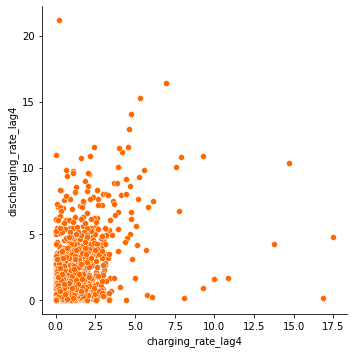

In [106]:
sns.set_palette(custom_palette1)
sns.relplot(data=failed_true, x='charging_rate_lag4', y='discharging_rate_lag4', kind='scatter')
plt.show()

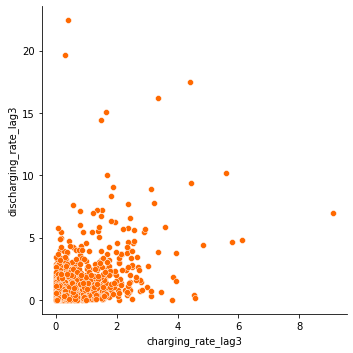

In [107]:
sns.relplot(data=failed_true, x='charging_rate_lag3', y='discharging_rate_lag3', kind='scatter')
plt.show()

**the difference in the charging and discharging rate from 4 to 3 days prior to april first is greater with devices that didn't fail yet - charging rate up to 1000 with discharging rate delta up to 2000. devices that did fail experience less fluctuations is (dis-)charging rate difference.**

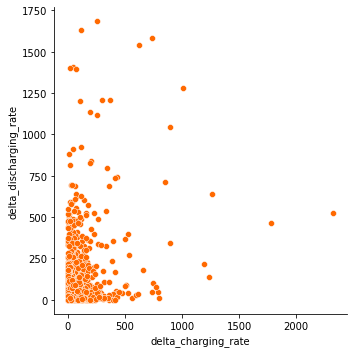

In [108]:
sns.relplot(data=failed_false, x='delta_charging_rate', y='delta_discharging_rate', kind='scatter')
plt.show()

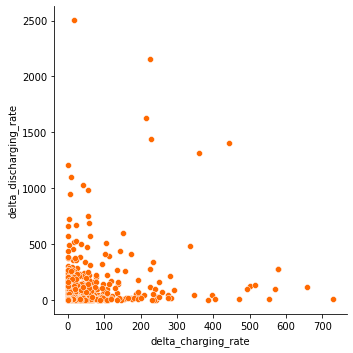

In [109]:
sns.relplot(data=failed_true, x='delta_charging_rate', y='delta_discharging_rate', kind='scatter')
plt.show()

*names of new dataframes: 
train (-added columns: showing differences between charging and discharging rates for lag4-lag 3, month deployed + year deployed columns, age of battery in months, modified datetime format), 
new_df, 
abnormal_cycle_time, 
normal_cycle_time, 
abnormal_cycle_time_failed, 
df_different_size*

## Additional: attempting to handle datetime format and columns - still not considered by model

In [110]:
#creating lists of columns we want to drop
cols_avg_time_charging = []
cols_avg_time_discharging = []
for i in range(5,15): 
    col_charging = "avg_time_charging_lag" + str(i)
    cols_avg_time_charging.append(col_charging)
    col_discharging = "avg_time_discharging_lag" + str(i)
    cols_avg_time_discharging.append(col_discharging)

cols_charging_rate = []
for i in range(5,8):
    col_charging_rate = "charging_rate_lag" + str(i)
    cols_charging_rate.append(col_charging_rate)

cols_discharging_rate = []    
for i in range(5,9):
    col_discharging_rate = "discharging_rate_lag" + str(i)
    cols_discharging_rate.append(col_discharging_rate)

#combining them into one list
list_of_field_names_with_nan = []
list_of_field_names_with_nan.extend(cols_discharging_rate)
list_of_field_names_with_nan.extend(cols_charging_rate)
list_of_field_names_with_nan.extend(cols_avg_time_discharging)
list_of_field_names_with_nan.extend(cols_avg_time_charging)


#modifying the dataframe by dropping the said columns
train = train.drop(columns=list_of_field_names_with_nan)

In [111]:

#creating new dataframe with reordered columns for better data understanding
new_df = train.reindex(columns=['deviceid', 'avg_volt_change_charging', 'avg_volt_change_discharging', 'max_voltage_day', 
                                'fail_7', 'charge_cycle_time_below_12', 'age_of_battery', 'Date Deployed', 'Year Deployed', 'Month Deployed' 
                                'avg_time_charging_lag4', 'avg_time_charging_lag3', 'avg_time_charging_lag2', 'avg_time_charging_lag1', 
                                'avg_time_discharging_lag4', 'avg_time_discharging_lag3', 'avg_time_discharging_lag2', 'avg_time_discharging_lag1', 
                                'charging_rate_lag4', 'charging_rate_lag3', 
                                'discharging_rate_lag4', 'discharging_rate_lag3',
                                'avg_time_charging', 'avg_time_discharging', 'cycle_time', 'chargecycles', 'dischargecycles', 'piececount', 'total_off_time', 'number_times_restart'])

In [112]:
'''
#changing the datetime format in Date Deployed --- adding dashes to date!
train['Date Deployed'] = pd.to_datetime(train['Date Deployed']).dt.strftime('%Y-%m-%d')
years=[]
months=[]

for dates in train['Date Deployed']:
    dates[1].lstrip('0')
    dates = dates.split("-")
    year = int(dates[0])
    month = int(dates[1])
    years.append(year)
    months.append(month)

train['Year Deployed'] = years
train['Month Deployed'] = months
'''

'\n#changing the datetime format in Date Deployed --- adding dashes to date!\ntrain[\'Date Deployed\'] = pd.to_datetime(train[\'Date Deployed\']).dt.strftime(\'%Y-%m-%d\')\nyears=[]\nmonths=[]\n\nfor dates in train[\'Date Deployed\']:\n    dates[1].lstrip(\'0\')\n    dates = dates.split("-")\n    year = int(dates[0])\n    month = int(dates[1])\n    years.append(year)\n    months.append(month)\n\ntrain[\'Year Deployed\'] = years\ntrain[\'Month Deployed\'] = months\n'